Found 21005 images belonging to 4 classes.
Found 5212 images belonging to 4 classes.


C:\Users\Lenovo X260\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Lenovo X260\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
329/448 ━━━━━━━━━━━━━━━━━━━━ 1:39 837ms/step - accuracy: 0.3423 - loss: 1.3599

C:\Users\Lenovo X260\AppData\Local\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 333s 728ms/step - accuracy: 0.3439 - loss: 1.3581 - val_accuracy: 0.3665 - val_loss: 1.3152
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 124s 276ms/step - accuracy: 0.4272 - loss: 1.2695 - val_accuracy: 0.4979 - val_loss: 1.1783
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 139s 311ms/step - accuracy: 0.4958 - loss: 1.1648 - val_accuracy: 0.5272 - val_loss: 1.1013
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 126s 281ms/step - accuracy: 0.5346 - loss: 1.0965 - val_accuracy: 0.5493 - val_loss: 1.0585
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 124s 276ms/step - accuracy: 0.5506 - loss: 1.0510 - val_accuracy: 0.5652 - val_loss: 1.0146
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 125s 278ms/step - accuracy: 0.5730 - loss: 1.0091 - val_accuracy: 0.5815 - val_loss: 0.9828
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 124s 277ms/step - accuracy: 0.5947 - loss: 0.9711 - val_accuracy: 0.5900 - val_loss: 0.9676
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 126s 280ms/step - accuracy: 0.6081 - loss: 0.94

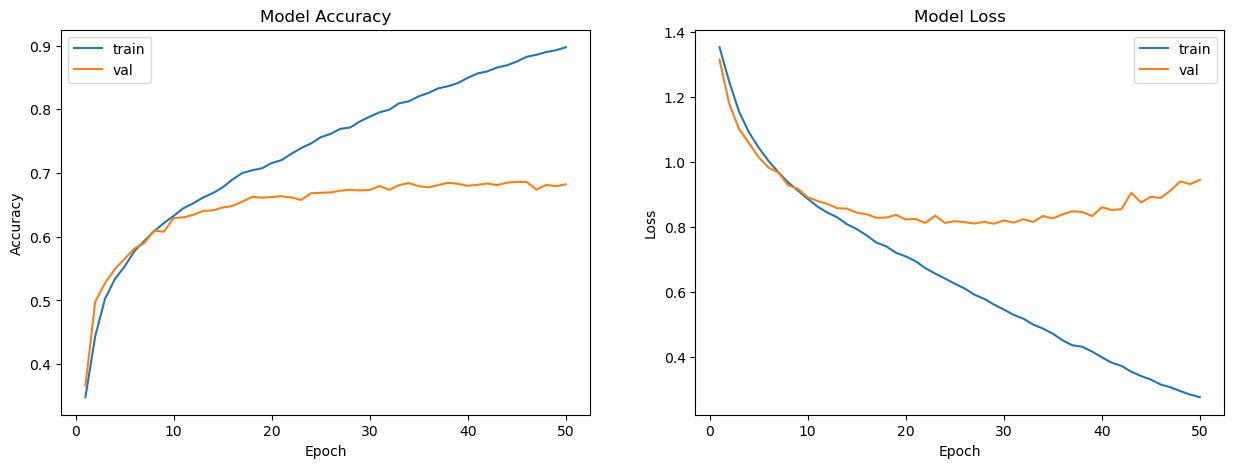

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
f
train_dir = r'E:\FYP_PROJECT\FER_2013_dataset\train'
val_dir = r'E:\FYP_PROJECT\FER_2013_dataset\test'

num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 50


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)  


model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


model_info = model.fit(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size
)


def calculate_accuracy(model, train_generator, validation_generator):
    train_loss, train_accuracy = model.evaluate(train_generator, steps=num_train // batch_size)
    val_loss, val_accuracy = model.evaluate(validation_generator, steps=num_val // batch_size)
    
    
    print(f'Training accuracy: {train_accuracy * 100:.2f}%')
    print(f'Validation accuracy: {val_accuracy * 100:.2f}%')
    
    return train_accuracy, val_accuracy

train_accuracy, val_accuracy = calculate_accuracy(model, train_generator, validation_generator)


def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(model_history.history['accuracy']) + 1), model_history.history['accuracy'])
    axs[0].plot(range(1, len(model_history.history['val_accuracy']) + 1), model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'val'], loc='best')

    
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'val'], loc='best')

    fig.savefig(r'E:\FYP_PROJECT\FER_2013_dataset/plot.png')
    plt.show()

plot_model_history(model_info)



In [3]:
# Save model weights after training
model.save(r'E:\FYP_PROJECT\FER_2013_dataset\FER_DATA.keras')


In [1]:
import tensorflow as tf

# Path to your .keras model
keras_model_path = r"E:\FYP_PROJECT\FER_2013_dataset\FER_DATA.keras"

# Load the Keras model
model = tf.keras.models.load_model(keras_model_path)

# Create a TFLite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# (Optional) Enable optimizations to reduce size
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_path = r"E:\FYP_PROJECT\FER_2013_dataset\FER_DATA.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"✅ Model converted and saved to: {tflite_model_path}")


INFO:tensorflow:Assets written to: C:\Users\LENOVO~1\AppData\Local\Temp\tmpdxjcdini\assets


INFO:tensorflow:Assets written to: C:\Users\LENOVO~1\AppData\Local\Temp\tmpdxjcdini\assets


Saved artifact at 'C:\Users\LENOVO~1\AppData\Local\Temp\tmpdxjcdini'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2327218358416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327218358032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327218359376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327218360336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327218362256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327218362832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327218363024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327218363600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327218363984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327218364944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  23272

In [1]:
from keras.models import load_model

# Load the original .keras model
keras_model = load_model(r"E:\FYP_PROJECT\FER_2013_dataset\FER_DATA.keras")

# Save a separate copy as .h5
keras_model.save(r"E:\FYP_PROJECT\FER_2013_dataset\FER_DATA_converted.h5")

print("✅ .h5 model saved separately without modifying the original .keras file")


✅ .h5 model saved separately without modifying the original .keras file


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


✅ Model loaded successfully.
Found 5212 images belonging to 4 classes.


C:\Users\Lenovo X260\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 60s 731ms/step


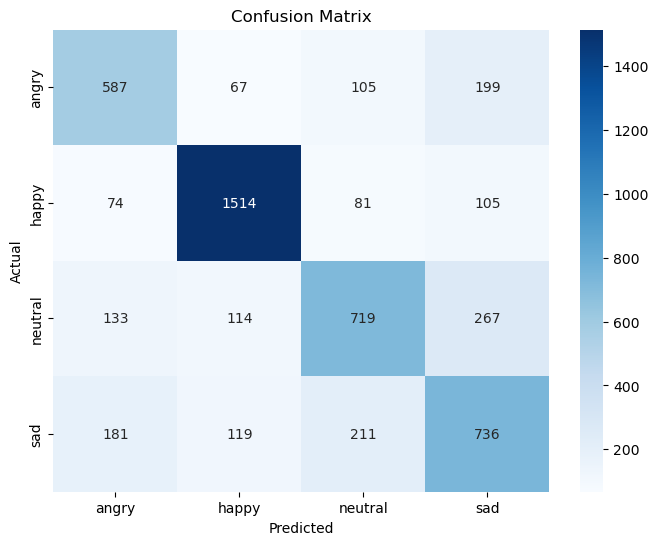

✅ Confusion matrix saved at: E:\FYP_PROJECT\FER_2013_dataset\confusion_matrix.png


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === STEP 1: Load the trained model ===
model_path = r"E:\FYP_PROJECT\FER_2013_dataset\FER_DATA_converted.h5"  # <-- update path if needed
model = load_model(model_path)
print("✅ Model loaded successfully.")

# === STEP 2: Prepare the validation/test data ===
val_dir = r"E:\FYP_PROJECT\FER_2013_dataset\test"
batch_size = 64

val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False  # Important: disable shuffle for correct label matching
)

# === STEP 3: Predict using the model ===
Y_true = validation_generator.classes
Y_pred_probs = model.predict(validation_generator, verbose=1)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# === STEP 4: Get class labels ===
class_names = list(validation_generator.class_indices.keys())

# === STEP 5: Create confusion matrix ===
cm = confusion_matrix(Y_true, Y_pred)

# === STEP 6: Plot and save confusion matrix ===
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

save_path = r"E:\FYP_PROJECT\FER_2013_dataset\confusion_matrix.png"
plt.savefig(save_path)
plt.show()

print(f"✅ Confusion matrix saved at: {save_path}")


In [ ]:
13ed54e8323340688c7ca6cf1789fd74